In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/psp-dataset/Patient Survival Detection/Data Dictionary.csv
/kaggle/input/psp-dataset/Patient Survival Detection/Dataset.csv


> ## 1. Import Libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.impute import SimpleImputer

> ## 2.Exploratory Data Analysis

In [9]:
df=pd.read_csv('/kaggle/input/psp-dataset/Patient Survival Detection/Dataset.csv')
df.head(5)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [10]:
df.shape

(91713, 186)

In [11]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   hospital_admit_source          70304 non-null  object 
 11   icu_admit_source               91601 non-null  object 
 12   icu_id                        

In [12]:
df.describe(exclude=object).T

,count,mean,std,min,25%,50%,75%,max
encounter_id,91713.0,65606.079280,37795.088538,1.0,32852.0,65665.0,98342.0,131051.0
patient_id,91713.0,65537.131464,37811.252183,1.0,32830.0,65413.0,98298.0,131051.0
hospital_id,91713.0,105.669262,62.854406,2.0,47.0,109.0,161.0,204.0
hospital_death,91713.0,0.086302,0.280811,0.0,0.0,0.0,0.0,1.0
age,87485.0,62.309516,16.775119,16.0,52.0,65.0,75.0,89.0
...,...,...,...,...,...,...,...,...
hepatic_failure,90998.0,0.012989,0.113229,0.0,0.0,0.0,0.0,1.0
immunosuppression,90998.0,0.026165,0.159628,0.0,0.0,0.0,0.0,1.0
leukemia,90998.0,0.007066,0.083763,0.0,0.0,0.0,0.0,1.0
lymphoma,90998.0,0.004132,0.064148,0.0,0.0,0.0,0.0,1.0


 #### Handling Missing values

In [13]:
# function returns the column names having more than 50% missing values
def missing_values(df):
    missing_df=pd.DataFrame(100*df.isnull().sum()/df.shape[0],columns=['% Missing'])
    return missing_df[missing_df['% Missing']>50]
print(f"{len(missing_values(df).index)} are the columns having missng % greater than 50")
print()
print("THESE BELOW ARE THE COLUMNS NAMES WHICH CAN BE DROPPED")
print(f"{list(missing_values(df).index)}")

74 are the columns having missng % greater than 50

THESE BELOW ARE THE COLUMNS NAMES WHICH CAN BE DROPPED
['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1

<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height:  1.7em;"> 

#### Dropping the columns having missing values greater than 50% and These below columns as they dont affect the model
##### 'encounter_id', 'hospital_admit_source','icu_admit_source','icu_id','icu_stay_type', 'patient_id', 'hospital_id', 'readmission_status'.

In [14]:
### 
irrevlant_cols_to_drop=['encounter_id','hospital_admit_source','icu_admit_source','icu_id','icu_stay_type','patient_id', 
            'hospital_id', 'readmission_status']
df.drop(columns=irrevlant_cols_to_drop+list(missing_values(df).index),inplace=True)

#### Body mass index (BMI) is a person’s weight in kilograms divided by the square of height in meters.
* In our data features bmi,height & weight are inter-related.
* So removing the missing values of inter related columns

In [15]:
df=df[df[['bmi','weight','height']].isnull().sum(axis=1)==0]

> #### Target/Label Column

In [16]:
def plot_count(df, col,title_name):
    # Set background color
    plt.rcParams['figure.facecolor'] = '#FFFAF0'
    
    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.1)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.4, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 13, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.rcParams['figure.facecolor'] = '#FFFFFF'

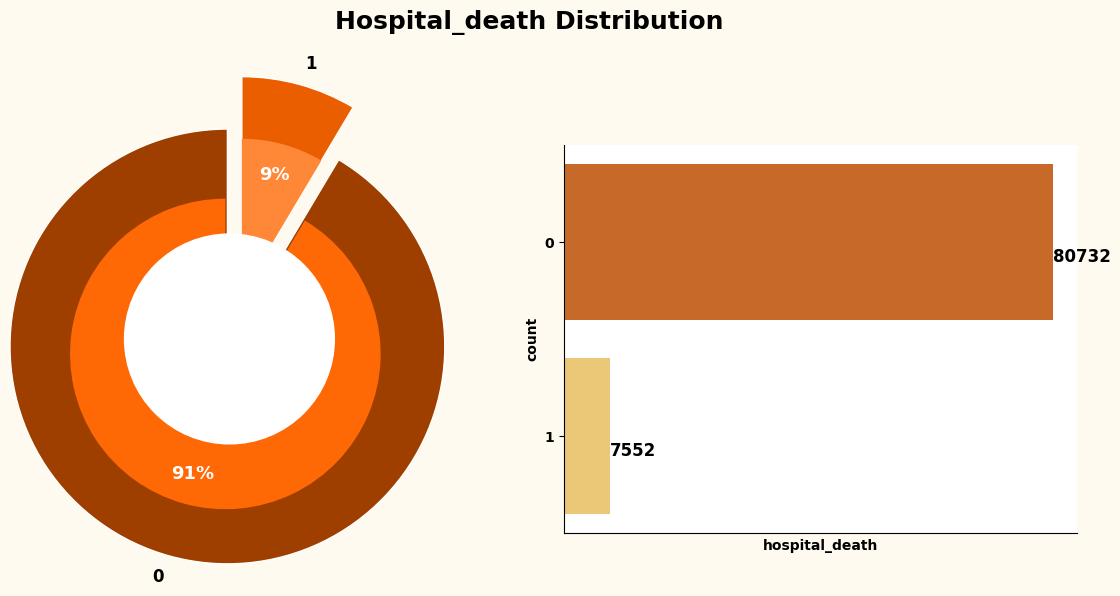

In [17]:
plot_count(df,'hospital_death','Hospital_death Distribution')

#### Types of ICUs

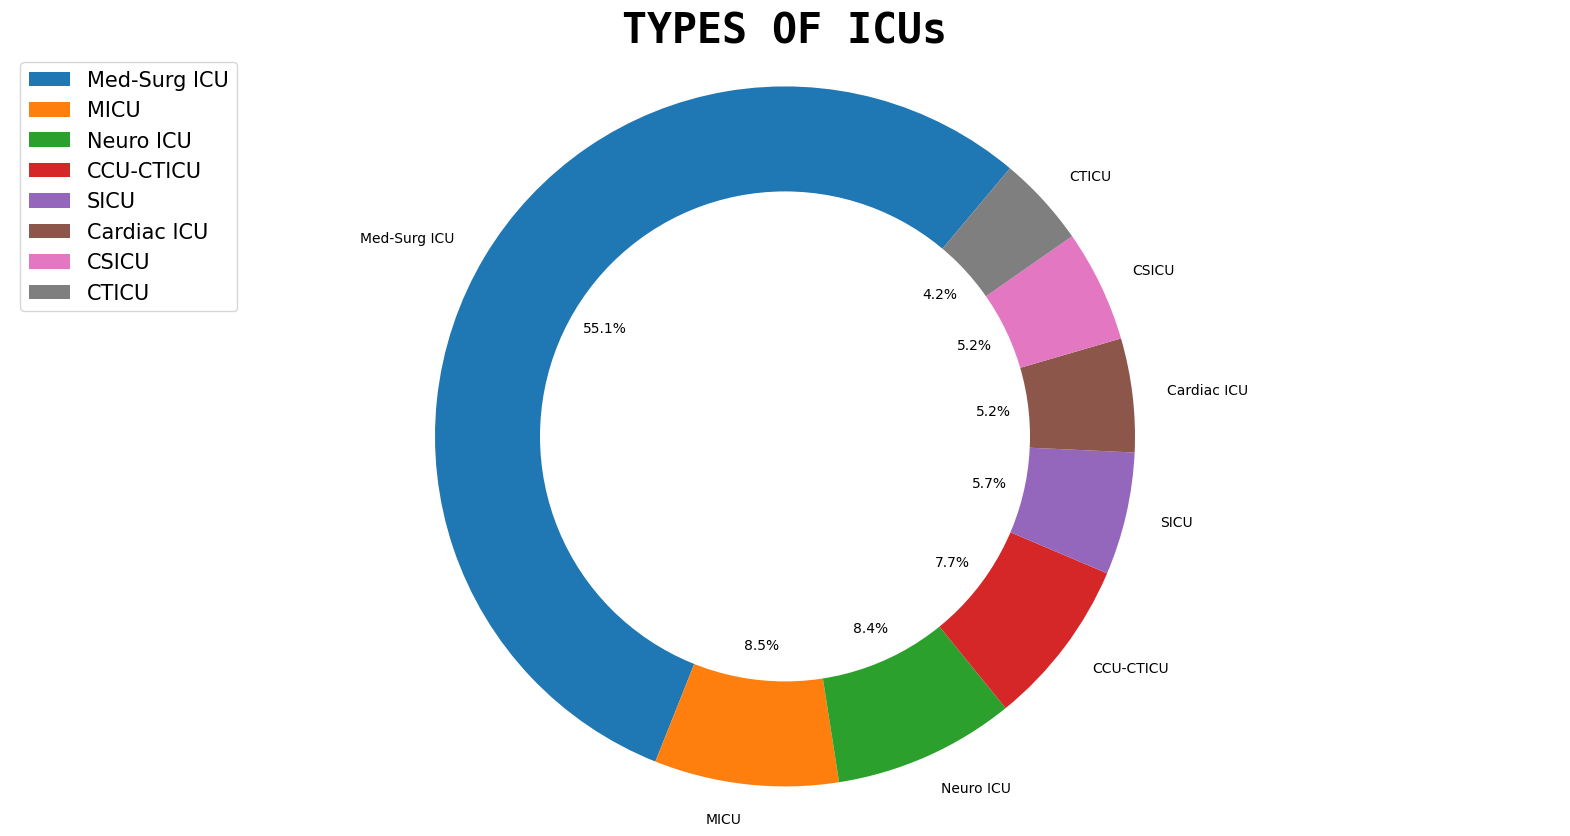

In [18]:
icu_type = df['icu_type'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(icu_type.values, labels=icu_type.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('TYPES OF ICUs', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

#### Hospital Death By Gender

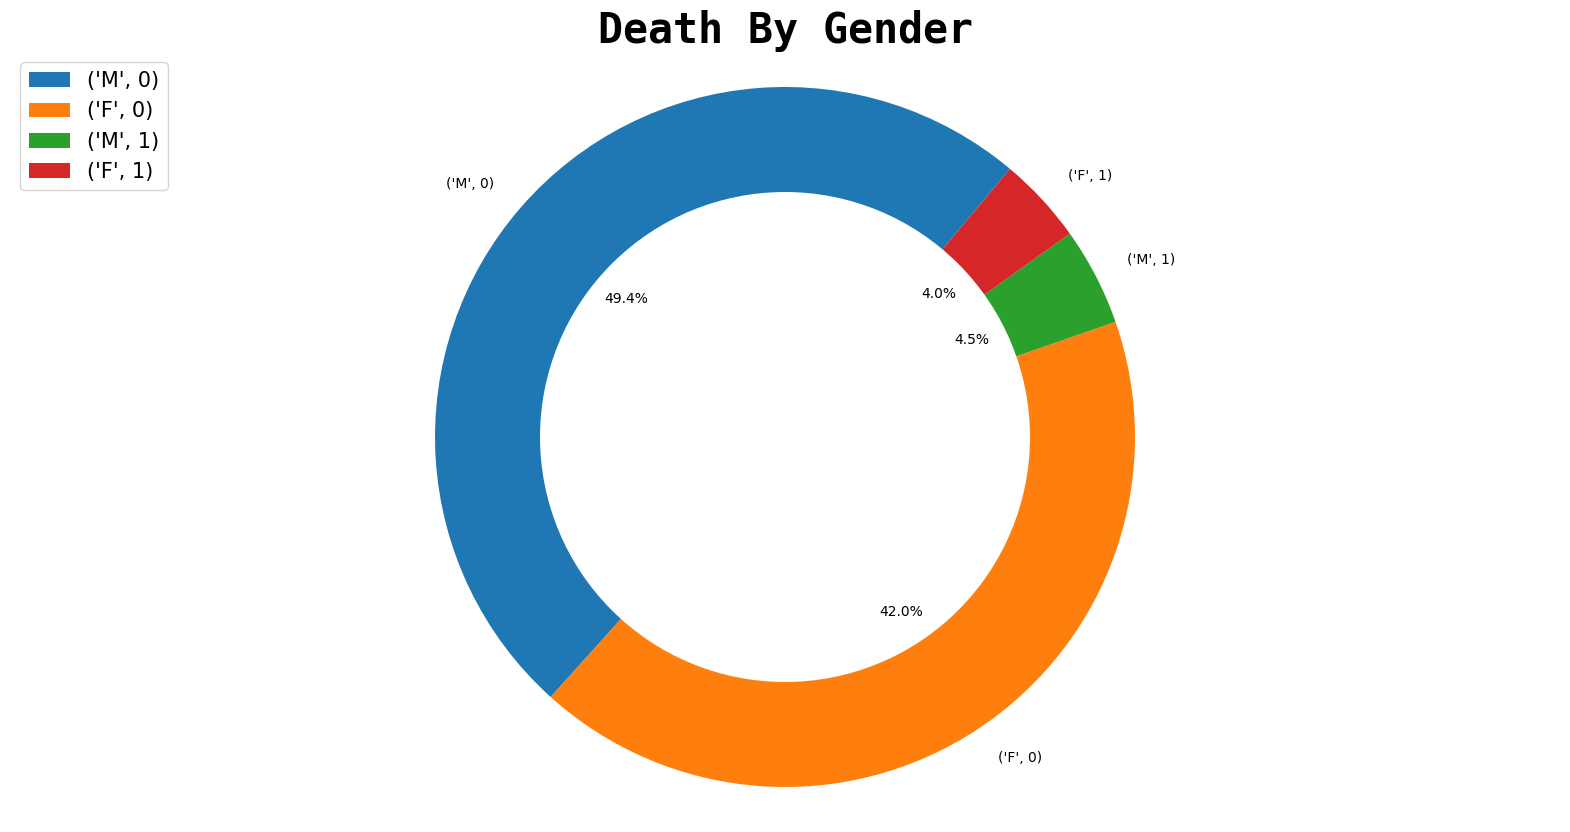

In [19]:
Hospital_death_by_ethinicity=df[['gender','hospital_death']].value_counts()
plt.figure(figsize=(20, 10))
plt.pie(Hospital_death_by_ethinicity.values, labels=Hospital_death_by_ethinicity.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Death By Gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

In [20]:
df[['bmi','age','gender']].value_counts()

bmi        age   gender
67.814990  51.0  M         11
14.844926  62.0  F         11
           77.0  F         10
           82.0  F         10
67.814990  59.0  F          9
                           ..
25.308106  86.0  F          1
25.307622  84.0  F          1
           49.0  M          1
25.306932  48.0  M          1
67.814990  89.0  M          1
Name: count, Length: 80238, dtype: int64

#### Hospital_Death by Ethnicity 

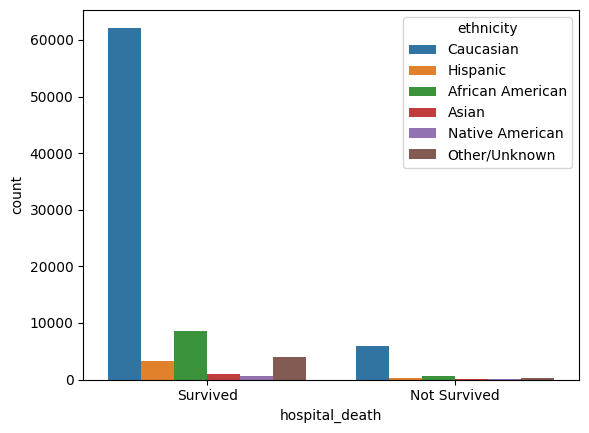

In [21]:
new=df['hospital_death'].apply(lambda x:'Survived' if x==0 else 'Not Survived')
sns.countplot(x=new,hue=df['ethnicity'])
plt.show()

#### Death Rate in different type of ICUs

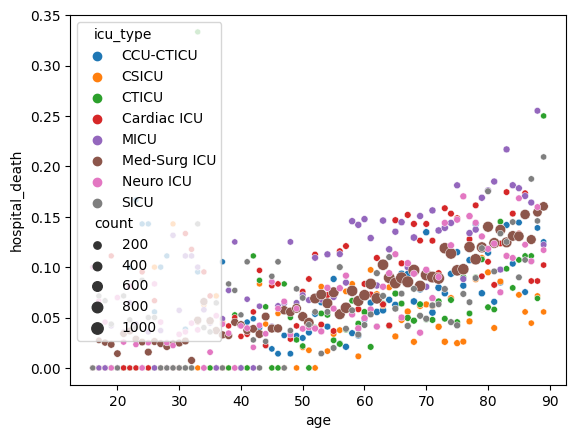

In [22]:
ICU_type= df[['icu_type','age','hospital_death']]

ICU_df=ICU_type.groupby(['icu_type','age']).mean().reset_index()
ICU_df['count']=ICU_type.groupby(['icu_type','age']).count().reset_index()['hospital_death']
sns.scatterplot(ICU_df, x="age", y="hospital_death", size="count", hue="icu_type")
plt.show()

#### Density Distribution plot of numerical columns

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


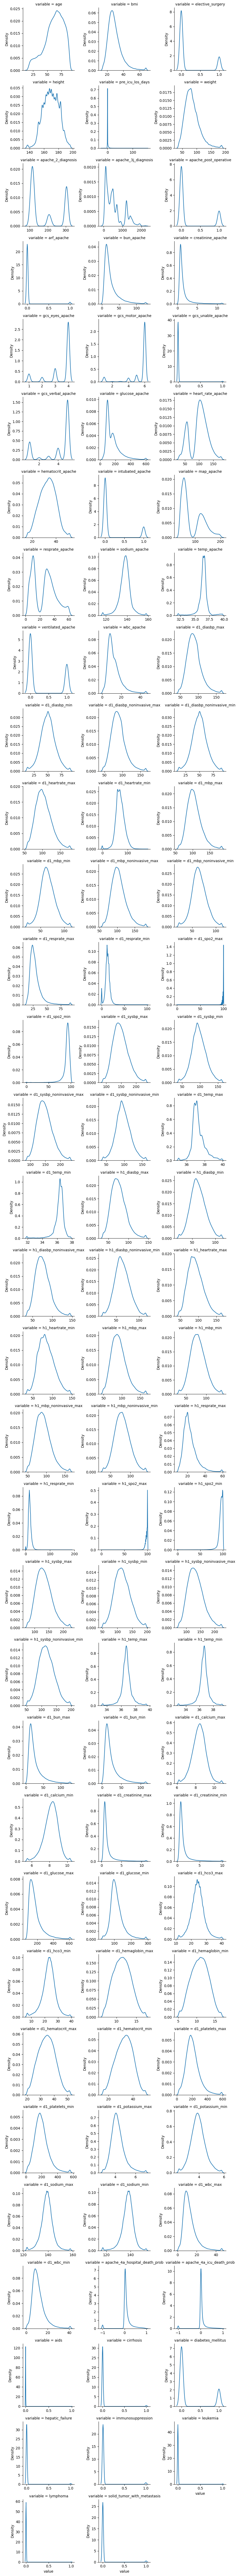

In [23]:
unpivot = pd.melt(df, df.describe().columns[0], df.describe().columns[1:])
g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color:#FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Data is highly Imbalanced- 91%(survived) and 9% (Not survived).
* Death Rate by Gender - 4% Female and 4.5% Males are Not survived.
* Med-Surg ICU has more than 50% of dataset.
* Caucasian are the Majority across the both Survived and Non-Survived people.
* Some of the ICU wards have higher death probability pertaining to being surgical wards.
* Most of the numerical columns are normally distributed.  

> ## 3. Data Preprocessing

In [24]:
num_columns=df.select_dtypes(exclude=object).columns.to_list()
print("Number of numerical columns",len(num_columns))
cat_columns=df.select_dtypes(include=object).columns.to_list()
print("Number of categorical Columns",len(cat_columns))

Number of numerical columns 99
Number of categorical Columns 5


#### Imputing missing values



<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height:  1.7em;">

 Null values for categories are replaced by **Mode**, and those for *numerical* are replaced by **Mean**

In [25]:
df.isna().sum()

hospital_death                    0
age                            4055
bmi                               0
elective_surgery                  0
ethnicity                      1211
                               ... 
leukemia                        684
lymphoma                        684
solid_tumor_with_metastasis     684
apache_3j_bodysystem           1566
apache_2_bodysystem            1566
Length: 104, dtype: int64

In [33]:
imputer=SimpleImputer(strategy='most_frequent')
df.iloc[:,:]=imputer.fit_transform(df)

##after filling missing values
df.isna().sum()

hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
                              ..
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
Length: 104, dtype: int64

In [35]:
df.head(10)

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,73.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,70.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,95.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,61.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
5,0,67.0,27.560000,0,Caucasian,M,190.5,Med-Surg ICU,0.000694,100.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,0,59.0,57.450000,0,Caucasian,F,165.1,Med-Surg ICU,0.000694,156.6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
9,0,50.0,25.710000,0,Caucasian,M,175.3,CCU-CTICU,0.060417,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
10,0,72.0,28.257052,1,Hispanic,F,154.9,Med-Surg ICU,0.004861,67.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
11,0,80.0,27.382812,1,Caucasian,F,160.0,Med-Surg ICU,1.271528,70.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Neurological,Neurologic
14,0,81.0,38.189067,1,Caucasian,M,172.7,MICU,1.376389,113.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [43]:
cat_df=df[cat_columns]
cat_df['apache_2_bodysystem'].value_counts()

apache_2_bodysystem
Cardiovascular         38924
Neurologic             11415
Respiratory            11236
Gastrointestinal        8711
Metabolic               7339
Trauma                  3680
Undefined diagnoses     3665
Renal/Genitourinary     2363
Haematologic             621
Undefined Diagnoses      330
Name: count, dtype: int64

,ethnicity,gender,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,CTICU,Cardiovascular,Cardiovascular
5,Caucasian,M,Med-Surg ICU,Neurological,Neurologic
...,...,...,...,...,...
91708,Caucasian,M,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Med-Surg ICU,Respiratory,Respiratory
